In [ ]:
#Import librabry
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as mticker
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv( '/content/drive/Shareddrives/HK hè/Phân tích dữ liệu thương mại điện tử/DATA+CODE/Retail_Transaction_Dataset.csv')
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


from google.colab import drive
drive.mount('/content/drive')

**CLEANING AND PREPROCESSING**

In [ ]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  100000
Number of columns in dataset is:  10


In [ ]:
df['State'] =[loc[-8:-6] for loc in df['StoreLocation']]
df['State'].value_counts().head(3)

,count
State,
AE,3681
AA,3594
AP,3531


In [ ]:
#Ghi chu cho cac bang
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'MP': 'Northern Mariana Islands',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PW': 'Palau',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VI': 'U.S. Virgin Islands',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'AE': 'Armed Forces Europe',
    'AA': 'Armed Forces Americas',
    'AP': 'Armed Forces Pacific',
    'FM': 'Federated States of Micronesia',
    'MH': 'Marshall Islands'
}

In [ ]:
df['State'] = df['State'].replace(state_mapping)
df['State'].head()

,State
0,Hawaii
1,Montana
2,Missouri
3,Missouri
4,Virginia


In [ ]:
df.drop('StoreLocation', axis = 1, inplace = True)

In [116]:
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CustomerID            100000 non-null  int64         
 1   ProductID             100000 non-null  object        
 2   Quantity              100000 non-null  int64         
 3   Price                 100000 non-null  float64       
 4   TransactionDate       100000 non-null  datetime64[ns]
 5   PaymentMethod         100000 non-null  category      
 6   ProductCategory       100000 non-null  category      
 7   DiscountApplied(%)    100000 non-null  float64       
 8   TotalAmount           100000 non-null  float64       
 9   State                 100000 non-null  object        
 10  month                 100000 non-null  category      
 11  DayOfWeek             100000 non-null  category      
 12  TransactionYearMonth  100000 non-null  period[M]     
 13  

**MISSING VALUE**

In [ ]:
df.isna().sum().rename_axis('Columns').reset_index(name = 'Missing values')

,Columns,Missing values
0,CustomerID,0
1,ProductID,0
2,Quantity,0
3,Price,0
4,TransactionDate,0
5,PaymentMethod,0
6,ProductCategory,0
7,DiscountApplied(%),0
8,TotalAmount,0
9,State,0


**DUPLICATE ROW**

In [ ]:
print(f"Number of duplicate rows : {len(df[df.duplicated()])}")

Number of duplicate rows : 0


**INVESTIGATING DATATYPE**

In [ ]:
df.dtypes

,0
CustomerID,int64
ProductID,object
Quantity,int64
Price,float64
TransactionDate,object
PaymentMethod,object
ProductCategory,object
DiscountApplied(%),float64
TotalAmount,float64
State,object


In [ ]:
#Changing Transactiondate to Datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [ ]:
#Setting Data Types of ProductCategory and PaymentMethod columns to "category"
df[['ProductCategory', 'PaymentMethod']] = df[['ProductCategory', 'PaymentMethod']].astype('category')
df[['ProductCategory', 'PaymentMethod']].dtypes

,0
ProductCategory,category
PaymentMethod,category


**Descriptive Statistic**

In [ ]:
df.describe()

,CustomerID,Quantity,Price,TransactionDate,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,2023-10-29 15:40:05.471399936,10.020155,248.334955
min,14.000000,1.000000,10.000430,2023-04-29 22:27:00,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,2023-07-30 06:45:15,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,2023-10-30 05:12:30,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,2024-01-29 05:44:00,15.018367,362.009980
max,999997.000000,9.000000,99.999284,2024-04-28 22:22:00,19.999585,896.141242
std,288460.917524,2.579808,25.971567,NaN,5.779534,184.554792


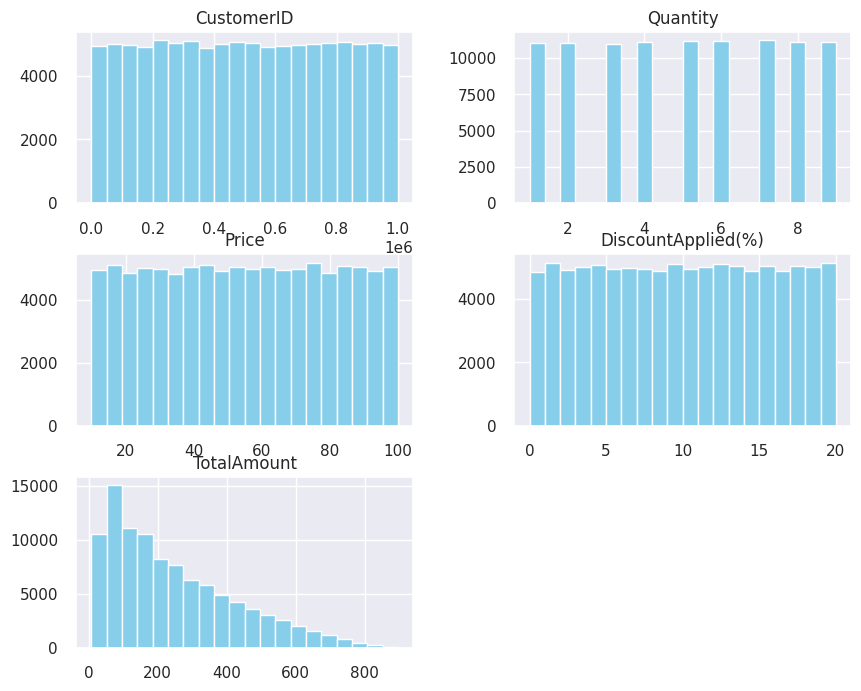

In [ ]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.hist(bins=20, figsize=(10, 8), color='skyblue')
plt.show()

** Non Numerical **

In [ ]:
df.describe(include = ['object', 'category'])

,ProductID,PaymentMethod,ProductCategory,State
count,100000,100000,100000,100000
unique,4,4,4,62
top,C,PayPal,Clothing,Armed Forces Europe
freq,25209,25067,25056,3681


In [ ]:
df.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'ProductCategory', 'DiscountApplied(%)', 'TotalAmount',
       'State'],
      dtype='object')

**Insight**

In [ ]:
#Sale performance. How do sales vary across different product categories?
df_prod = df.groupby('ProductCategory')
Product_sales = df_prod['Quantity'].sum().sort_values(ascending=False).rename('Total Sales')
Product_sales

,Total Sales
ProductCategory,
Books,126047
Electronics,125347
Clothing,125044
Home Decor,124491


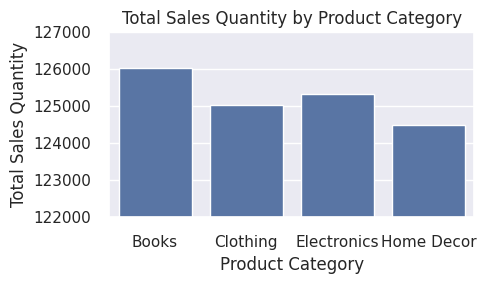

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x='ProductCategory', y='Quantity', estimator=sum, ci=None)
plt.title('Total Sales Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Quantity')
plt.ylim(122000, 127000)  # Adjust the range of y-axis here
plt.tight_layout()
plt.show()

In [ ]:
# Which product categories contribute the most to total revenue?
total_revenue = round(sum(df['TotalAmount']), 0)
prod_cont_rev = (((df_prod['TotalAmount'].sum()/total_revenue)*100).round(2)).rename("Revenue Contribution").astype(str)+"%"
prod_cont_rev

,Revenue Contribution
ProductCategory,
Books,25.2%
Clothing,24.99%
Electronics,24.95%
Home Decor,24.86%


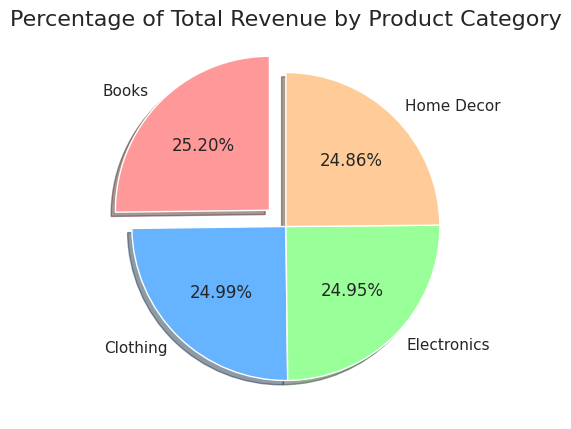

In [ ]:
plt.figure(figsize=(6, 5))
sum_total_amount_by_category = df.groupby('ProductCategory')['TotalAmount'].sum()
explode_values = [0.15 if amount == sum_total_amount_by_category.max() else 0 for amount in sum_total_amount_by_category]
plt.pie(sum_total_amount_by_category, labels=sum_total_amount_by_category.index, autopct='%1.2f%%', startangle=90, explode=explode_values, shadow=True, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Percentage of Total Revenue by Product Category', fontsize=16)
plt.show()

In [ ]:
import calendar
df['month'] = df['TransactionDate'].dt.month.apply(lambda x: calendar.month_abbr[x])
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

In [ ]:
# Setting month as category
df['month']=df['month'].astype('category')
df['month']=df['month'].cat.set_categories(
    new_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered = True,
)

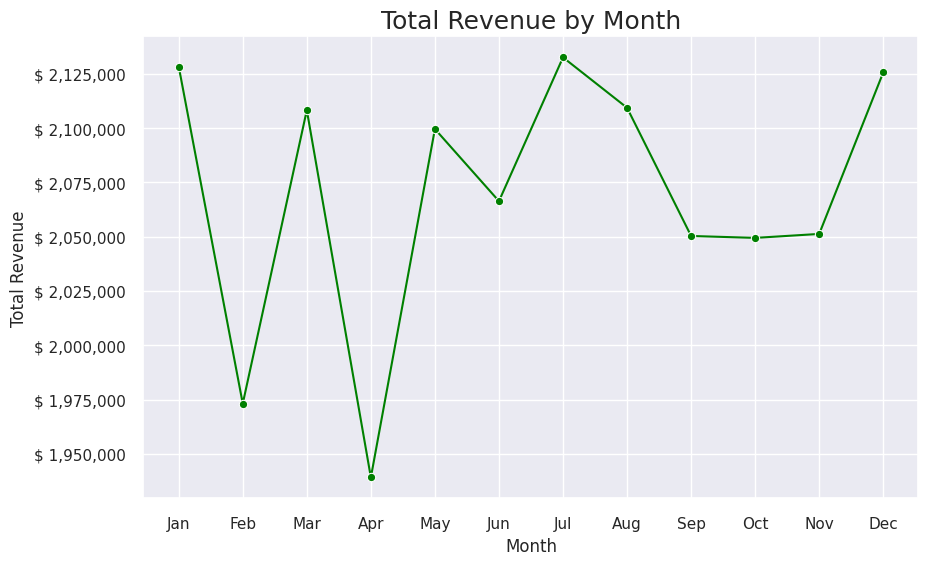

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='month', y='TotalAmount', marker='o', color='green', estimator = sum, ci =None)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('$ {x:,.0f}'))
plt.title('Total Revenue by Month', fontsize = 18)
plt.grid(True)
plt.show()

In [ ]:
# Setting DayOfWeek as category
df['DayOfWeek']=df['DayOfWeek'].astype('category')
df['DayOfWeek']=df['DayOfWeek'].cat.set_categories(
    new_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered = True,
)


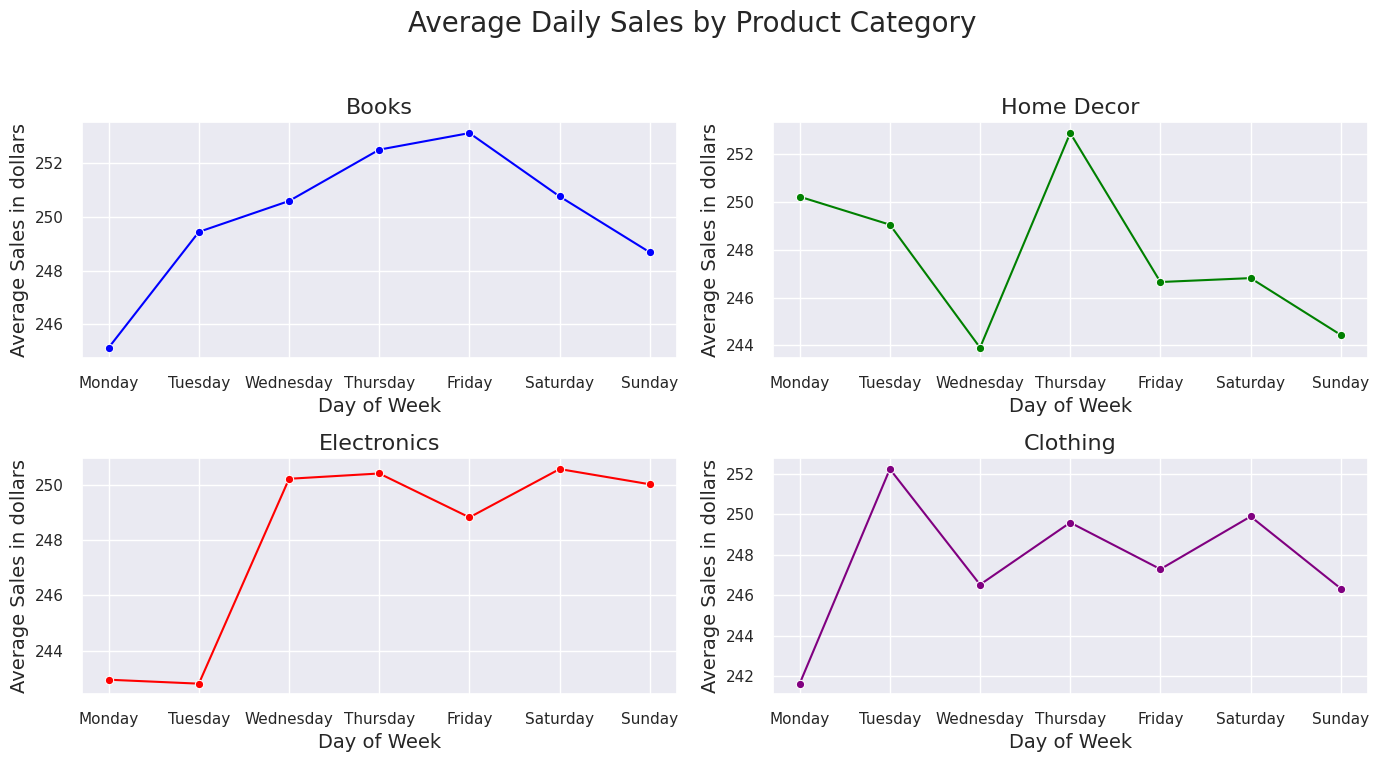

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))  # Create 2x2 subplot structure
fig.suptitle('Average Daily Sales by Product Category', fontsize=20)

categories = df['ProductCategory'].unique()
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors for the plots
for ax, category, color in zip(axs.flatten(), categories, colors):
    sns.lineplot(data=df[df['ProductCategory'] == category], x='DayOfWeek', y='TotalAmount', marker='o', estimator='mean', ci=None, ax=ax, color=color)
    ax.set_title(category, fontsize = 16)
    ax.set_xlabel('Day of Week', fontsize=14)
    ax.set_ylabel('Average Sales in dollars', fontsize=14)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


# **CALCULATE RFM**

In [ ]:
print("Min TransactionDate", df['TransactionDate'].min(), "Max TransactionDate", df['TransactionDate'].max())

Min TransactionDate 2023-04-29 22:27:00 Max TransactionDate 2024-04-28 22:22:00


In [ ]:
presence = dt.datetime(2024, 4, 29)

# Chuyển đổi kiểu dữ liệu của cột 'TransactionDate' sang đối tượng datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Tính toán các giá trị RFM cho từng khách hàng
grouped_data = df.groupby('CustomerID')

# Tính toán các giá trị RFM
recency = grouped_data['TransactionDate'].apply(lambda x: (presence - x.max()).days)
frequency = grouped_data['TransactionDate'].count()
monetary_value = grouped_data['TotalAmount'].sum()

# Tạo DataFrame mới chứa các giá trị RFM
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary_value': monetary_value})

# Đảm bảo cột 'recency' có kiểu dữ liệu int
rfm['recency'] = rfm['recency'].astype(int)

# Kiểm tra kết quả
print(rfm.head())

            recency  frequency  monetary_value
CustomerID                                    
14              266          1      256.232791
42              345          1      502.656523
49              328          1       21.399047
59               27          2      249.492696
65              315          1      548.006625


In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,95215.0,178.873644,105.262883,0.000000,87.000000,177.000000,270.00000,365.000000
frequency,95215.0,1.050255,0.226357,1.000000,1.000000,1.000000,1.00000,4.000000
monetary_value,95215.0,260.814950,197.112734,8.274825,99.493069,210.700964,378.62633,2002.072661


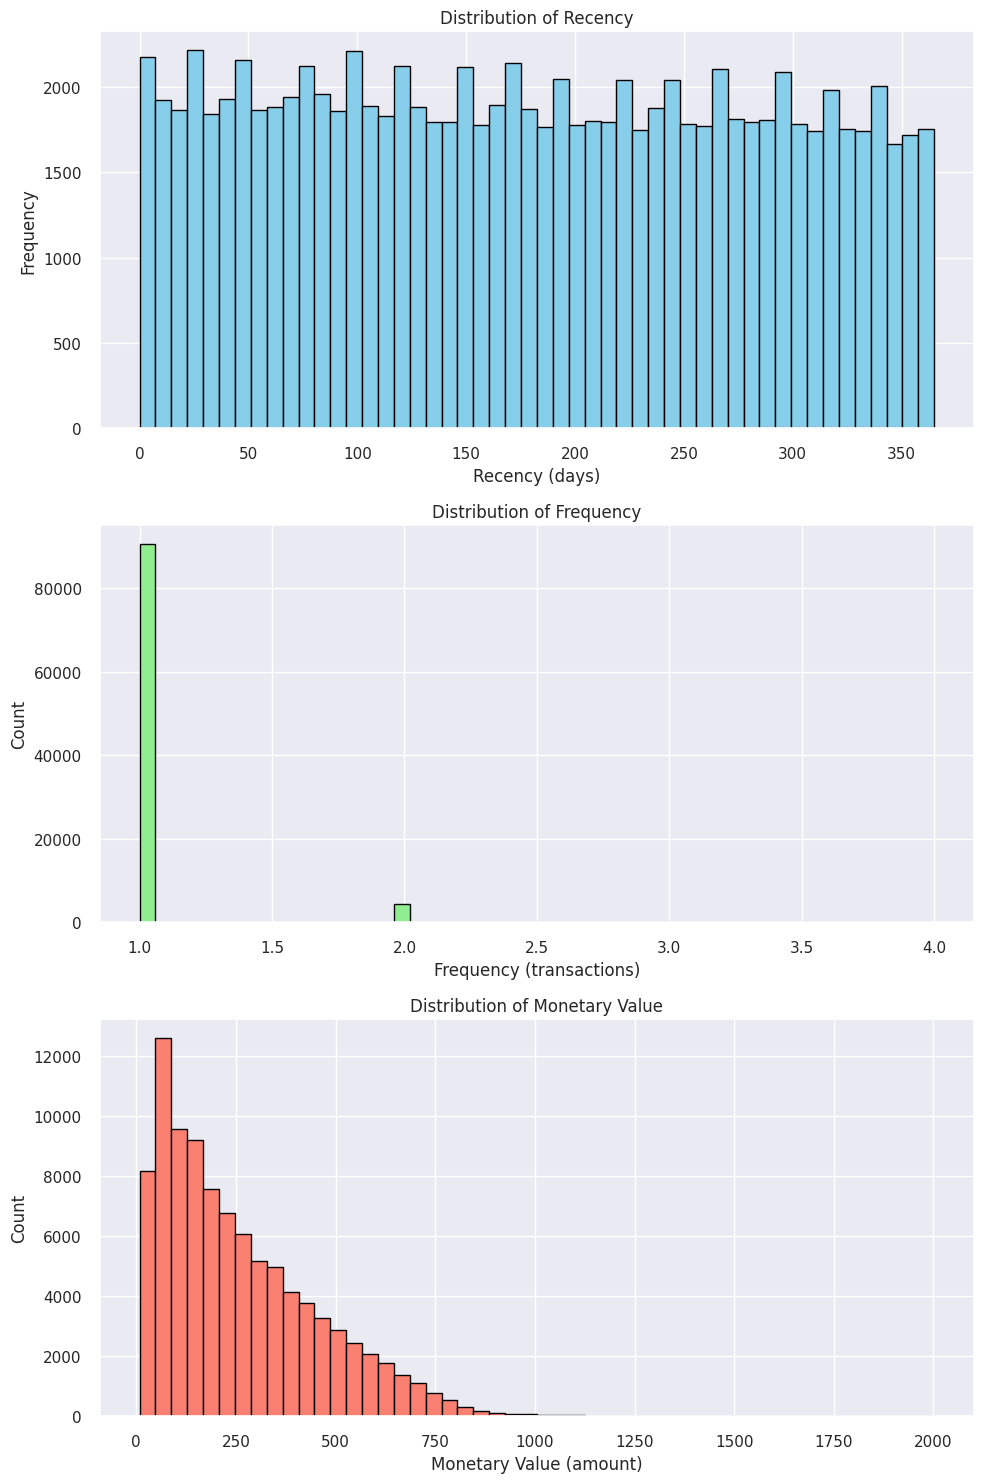

In [ ]:
# Create subplots for visualization
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Distribution of Recency
axes[0].hist(rfm['recency'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Recency')
axes[0].set_xlabel('Recency (days)')
axes[0].set_ylabel('Frequency')

# Distribution of Frequency
axes[1].hist(rfm['frequency'], bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('Frequency (transactions)')
axes[1].set_ylabel('Count')

# Distribution of Monetary Value
axes[2].hist(rfm['monetary_value'], bins=50, color='salmon', edgecolor='black')
axes[2].set_title('Distribution of Monetary Value')
axes[2].set_xlabel('Monetary Value (amount)')
axes[2].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
#check if data is skewed
from scipy import stats #library
def check_skew(rfm, column):
    skew = stats.skew(rfm[column])
    skewtest = stats.skewtest(rfm[column])
    plt.figure(figsize=(12, 8))
    sns.distplot(rfm[column])
    plt.title('Distribution of ' + column)
    plt.show()
    print(f"{column}'s: Skew: {skew}, Skewtest: {skewtest}")
    return

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def analyze_skewness(column):
    fig, ax = plt.subplots(2, 2, figsize=(8, 8))

    # Handle infinite values
    original_data = rfm[column].replace([np.inf, -np.inf], np.nan).dropna()
    log_data = np.log(rfm[column].replace(0, np.nan)).replace([np.inf, -np.inf], np.nan).dropna()
    cube_root_data = (rfm[column]**(1/3)).replace([np.inf, -np.inf], np.nan).dropna()
    boxcox_data, _ = stats.boxcox(rfm[column].replace(0, np.nan).dropna())

    sns.distplot(original_data, ax=ax[0, 0])
    sns.distplot(log_data, ax=ax[0, 1])
    sns.distplot(cube_root_data, ax=ax[1, 0])
    sns.distplot(boxcox_data, ax=ax[1, 1])

    ax[0, 0].set_title('Original')
    ax[0, 1].set_title('Log Transformation')
    ax[1, 0].set_title('Cube Root Transformation')
    ax[1, 1].set_title('Box-Cox Transformation')
    plt.tight_layout()
    plt.show()

    print(f'{column} Skew: {original_data.skew().round(2)}')
    print(f'{column} Log: {log_data.skew().round(2)}')
    print(f'{column} Sqrt: {cube_root_data.skew().round(2)}')
    print(f'{column} Boxcox: {pd.Series(boxcox_data).skew().round(2)}')
    print(f'{column} Zscore: {stats.zscore(original_data).skew().round(2)}')

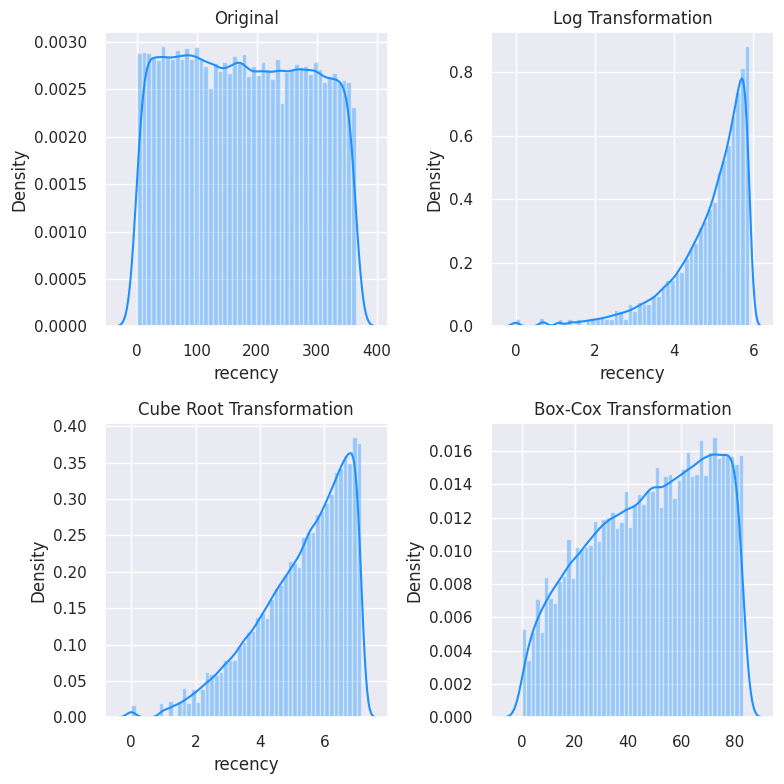

recency Skew: 0.04
recency Log: -1.71
recency Sqrt: -0.87
recency Boxcox: -0.28
recency Zscore: 0.04


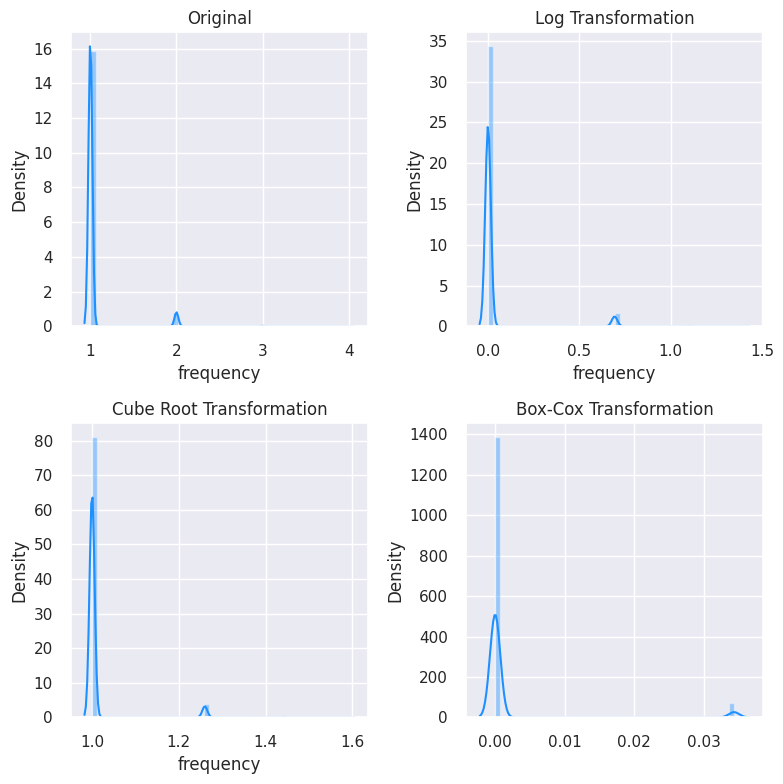

frequency Skew: 4.58
frequency Log: 4.31
frequency Sqrt: 4.37
frequency Boxcox: 4.2
frequency Zscore: 4.58


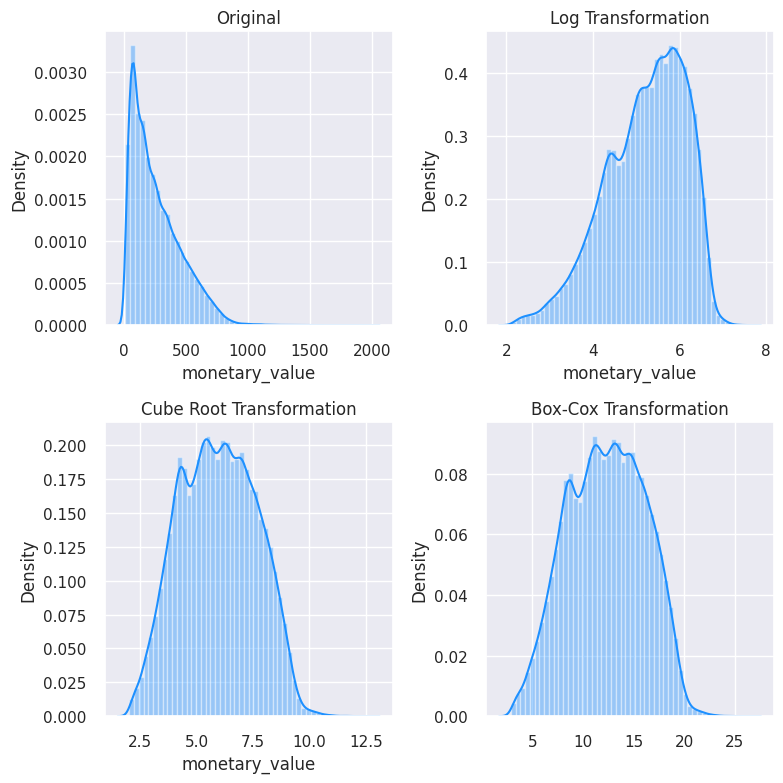

monetary_value Skew: 1.04
monetary_value Log: -0.58
monetary_value Sqrt: 0.02
monetary_value Boxcox: -0.06
monetary_value Zscore: 1.04


In [ ]:
# Set seaborn palette
sns.set_palette(['#1E90FF'])

# Analyze skewness for Recency, Frequency, and Monetary Value
analyze_skewness('recency')
analyze_skewness('frequency')
analyze_skewness('monetary_value')

In [ ]:
# Adjust zero values to a small positive number for Box-Cox transformation
rfm['recency'] = rfm['recency'].replace(0, 1e-6)
rfm['frequency'] = rfm['frequency'].replace(0, 1e-6)
rfm['monetary_value'] = rfm['monetary_value'].replace(0, 1e-6)

# Transform the data using Box-Cox transformation
df_rfm = pd.DataFrame()
df_rfm['recency'] = stats.boxcox(rfm['recency'])[0]
df_rfm['frequency'] = stats.boxcox(rfm['frequency'])[0]
df_rfm['monetary_value'] = stats.boxcox(rfm['monetary_value'])[0]

# Display the transformed data
df_rfm.head()

,recency,frequency,monetary_value
0,55.084460,0.000000,13.303111
1,65.413549,0.000000,16.806716
2,63.268759,0.000000,4.849155
3,11.421534,0.034335,13.177638
4,61.601828,0.000000,17.305566


In [ ]:
scaler = StandardScaler()
scaler.fit(df_rfm)
df_scaled = scaler.transform(df_rfm)

In [ ]:
pd.DataFrame(df_scaled, columns=df_rfm.columns).head()

,recency,frequency,monetary_value
0,0.831600,-0.225849,0.258973
1,1.403344,-0.225849,1.186024
2,1.284624,-0.225849,-1.977939
3,-1.585268,4.427736,0.225773
4,1.192354,-0.225849,1.318020


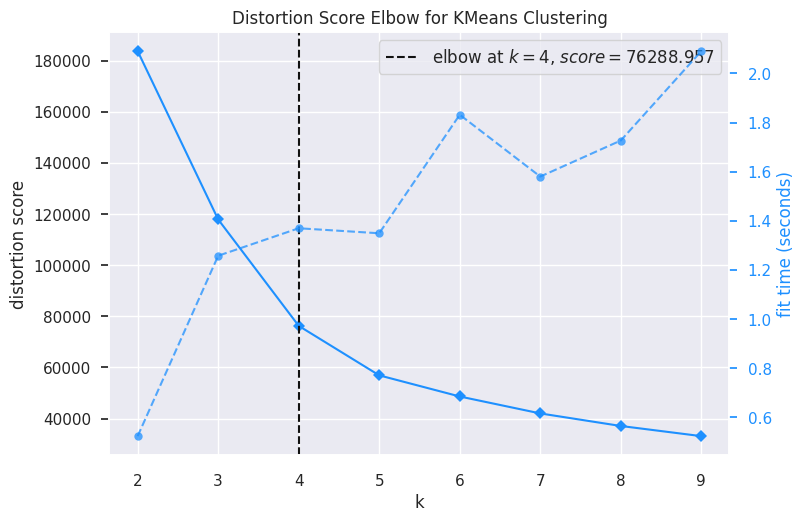

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
k_means = KMeans(random_state=1)
elbow = KElbowVisualizer(k_means, k=(2, 10))
elbow.fit(df_scaled)
elbow.show()

In [ ]:
# Calculate Silhouette Scores
candidates = [i for i in range(2, 7)]
sc = []

for n_clusters in candidates:
    km = KMeans(n_clusters=n_clusters, random_state=0)
    km_labels = km.fit_predict(df_scaled)
    del km
    score = silhouette_score(df_scaled, km_labels)
    sc.append(score)
    print(f'Number of Clusters: {n_clusters}, Silhouette Score: {score}')

Number of Clusters: 2, Silhouette Score: 0.6579864476155927
Number of Clusters: 3, Silhouette Score: 0.37284909354995593
Number of Clusters: 4, Silhouette Score: 0.3936068545890681
Number of Clusters: 5, Silhouette Score: 0.39103853290265056
Number of Clusters: 6, Silhouette Score: 0.36256771302055313


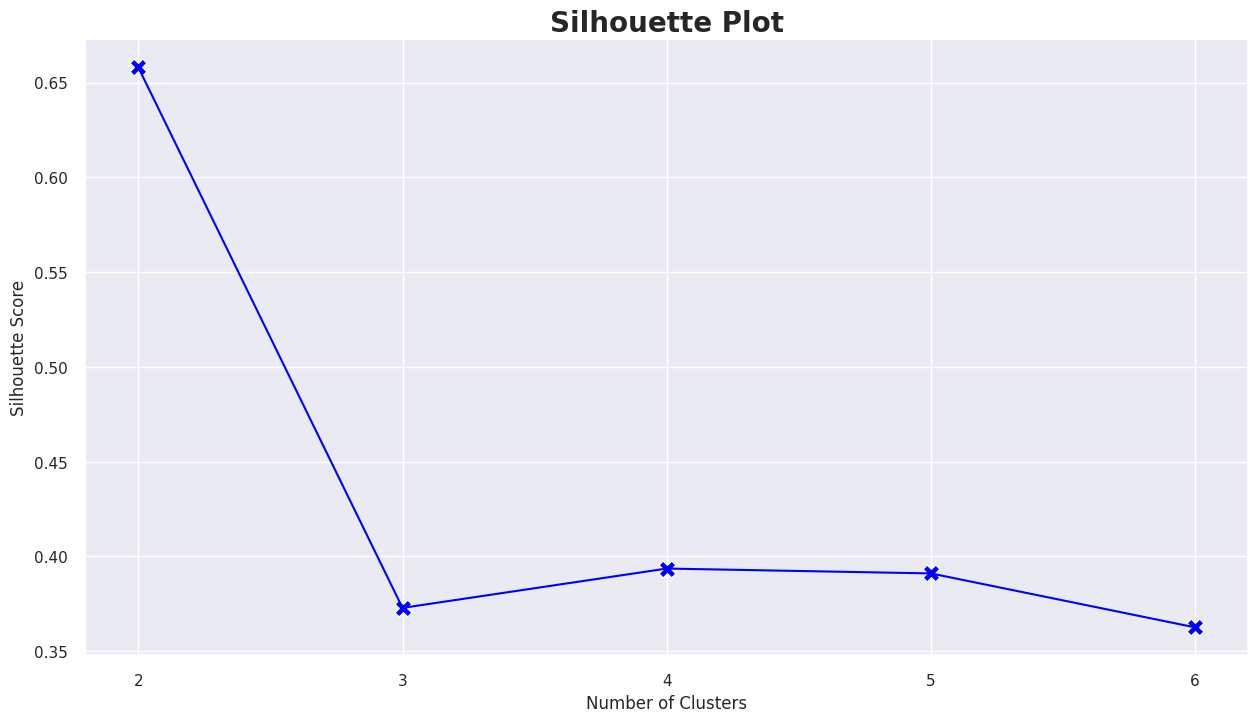

In [ ]:
# Creating a dataframe for the sum of silhouette score
df_sc = pd.DataFrame({'Number of Clusters': candidates, 'Silhouette Score': sc})

# Plotting sum of squared error results
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_sc, x='Number of Clusters', y='Silhouette Score', color='blue')
sns.scatterplot(data=df_sc, x='Number of Clusters', y='Silhouette Score', marker='X', s=150, color='blue')

# Customizing the plot
plt.xticks([2, 3, 4, 5, 6])
plt.title('Silhouette Plot', fontweight='bold', fontsize=20)
plt.show()

In [ ]:
# Perform K-means clustering with k = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_rfm['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the DataFrame with cluster labels
print(df_rfm.head())

     recency  frequency  monetary_value  Cluster
0  55.084460   0.000000       13.303111        2
1  65.413549   0.000000       16.806716        2
2  63.268759   0.000000        4.849155        1
3  11.421534   0.034335       13.177638        0
4  61.601828   0.000000       17.305566        2


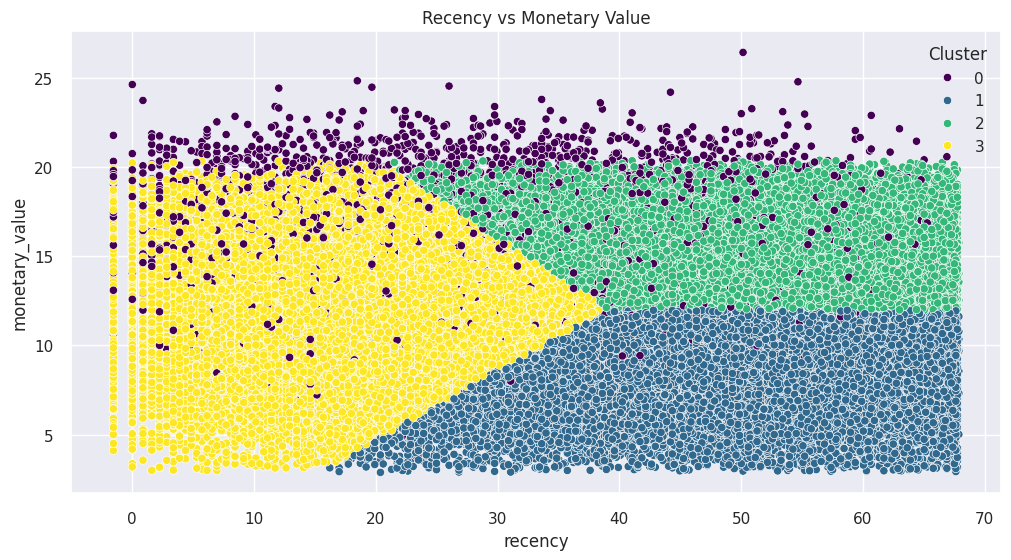

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_rfm, x='recency', y='monetary_value', hue='Cluster', palette='viridis')
plt.title('Recency vs Monetary Value')
plt.show()

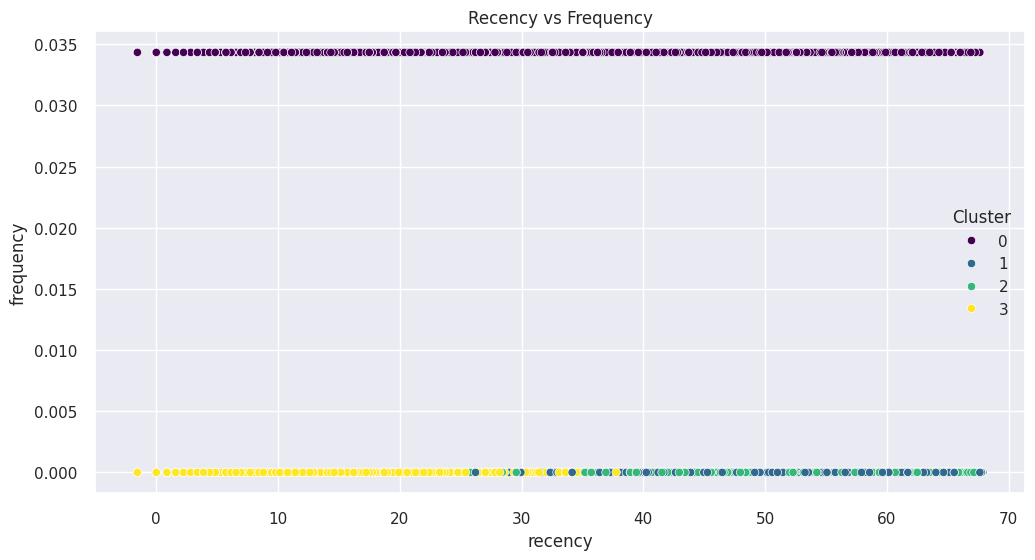

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_rfm, x='recency', y='frequency', hue='Cluster', palette='viridis')
plt.title('Recency vs Frequency')
plt.show()

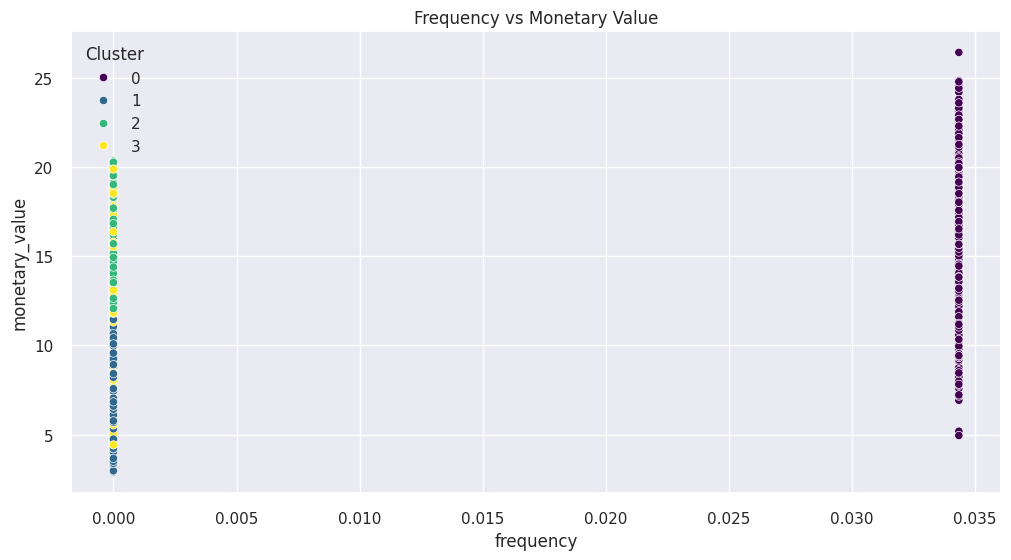

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_rfm, x='frequency', y='monetary_value', hue='Cluster', palette='viridis')
plt.title('Frequency vs Monetary Value')
plt.show()

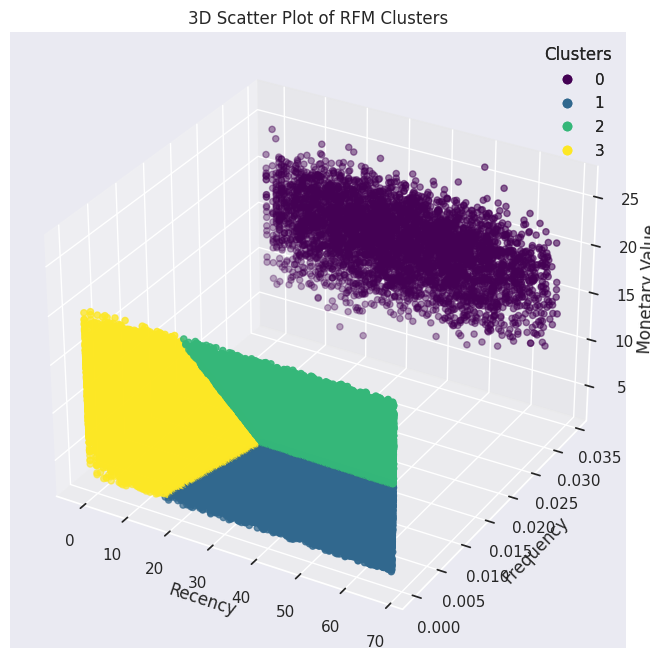

In [ ]:
# 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_rfm['recency'], df_rfm['frequency'], df_rfm['monetary_value'], c=df_rfm['Cluster'], cmap='viridis')
ax.set_title('3D Scatter Plot of RFM Clusters')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

# **COHORT**

In [ ]:
# Extract year and month from TransactionDate for Cohort
df['TransactionYearMonth'] = df['TransactionDate'].dt.to_period('M')

# Create a DataFrame for first purchase
df_first_purchase = df.groupby('CustomerID')['TransactionDate'].min().reset_index()
df_first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']

# Merge the first purchase date with the original dataframe
df = pd.merge(df, df_first_purchase, on='CustomerID')

# Extract cohort month
df['CohortMonth'] = df['FirstPurchaseDate'].dt.to_period('M')

# Show the first few rows to verify
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount,State,month,DayOfWeek,TransactionYearMonth,FirstPurchaseDate,CohortMonth
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,Books,18.677100,455.862764,Hawaii,Dec,Tuesday,2023-12,2023-12-26 12:32:00,2023-12
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,Home Decor,14.121365,258.306546,Montana,Aug,Saturday,2023-08,2023-08-05 00:00:00,2023-08
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,Books,15.943701,212.015651,Missouri,Mar,Monday,2024-03,2024-03-11 18:51:00,2024-03
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,Books,6.686337,461.343769,Missouri,Oct,Friday,2023-10,2023-10-27 22:00:00,2023-10
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,Electronics,4.030096,626.030484,Virginia,Dec,Friday,2023-12,2023-12-22 11:38:00,2023-12


In [ ]:
from operator import attrgetter
# Extract cohort month
df['CohortMonth'] = df['FirstPurchaseDate'].dt.to_period('M')

# Calculate the difference in months between the transaction date and the cohort start
df['CohortIndex'] = ((df['TransactionYearMonth'] - df['CohortMonth']).apply(attrgetter('n')))

# Group by CohortMonth and CohortIndex to get the count of active customers
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Create a pivot table to see the cohorts over time
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Fill missing values with 0
cohort_pivot = cohort_pivot.fillna(0)

# Calculate the retention rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_rate = cohort_pivot.divide(cohort_size, axis=0)

# Display the retention rate DataFrame
print(retention_rate.head())

CohortIndex   0         1         2         3         4         5         6   \
CohortMonth                                                                    
2023-04      1.0  0.011364  0.003788  0.000000  0.011364  0.011364  0.018939   
2023-05      1.0  0.007563  0.009484  0.007563  0.008523  0.009604  0.007683   
2023-06      1.0  0.007486  0.009326  0.007976  0.007976  0.009081  0.008835   
2023-07      1.0  0.007231  0.006875  0.008061  0.009602  0.006994  0.008653   
2023-08      1.0  0.006538  0.007869  0.007748  0.008232  0.007869  0.006538   

CohortIndex        7         8         9         10        11  
CohortMonth                                                    
2023-04      0.015152  0.000000  0.015152  0.011364  0.003788  
2023-05      0.008523  0.008884  0.006843  0.009364  0.006483  
2023-06      0.008099  0.007854  0.010799  0.007240  0.000000  
2023-07      0.008772  0.008179  0.008772  0.000000  0.000000  
2023-08      0.008838  0.006416  0.000000  0.000000  0.

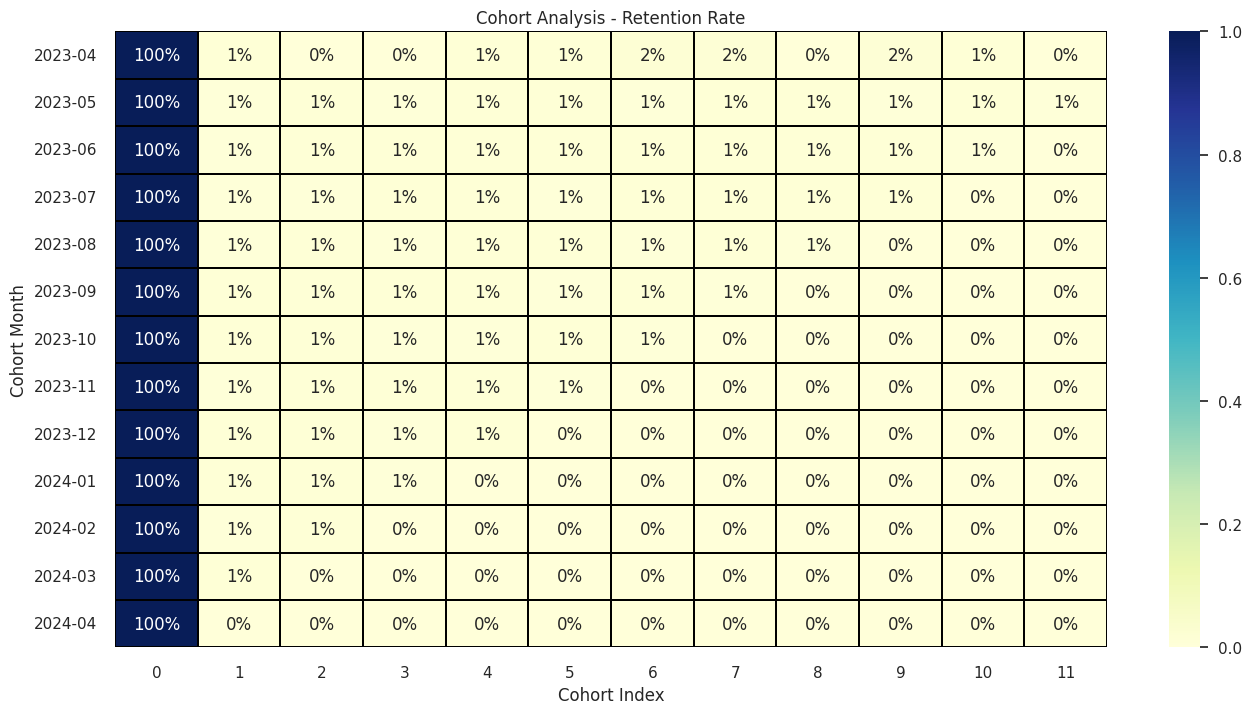

In [ ]:
# Visualize the retention rate
plt.figure(figsize=(16, 8))
sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='YlGnBu', linewidths=0.3, linecolor='black')
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

In [ ]:
# Filter data for the first cohort
first_cohort_data = df[df['CohortMonth'] == '2023-04']